# Data Analyst Associate Practical Exam Submission
This is my solution to the Data Analyst Associate Practical Exam. You can find the project information that accompanies this solution in the [Data Analyst Associate Certification](https://app.datacamp.com/certification/associate-data-analyst).

The [executive summary](https://app.datacamp.com/workspace/w/92ceae04-7b62-4562-9ce1-c15fc685aac5/edit) of this presentation.

## Context
[Link with the PDF](https://s3.amazonaws.com/talent-assets.datacamp.com/Practical+-+DAA+-+Food+Claims+-+2212.pdf)

## Imports

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load The data

In [42]:

# Read data from 'coffee.csv' and store it in a dataset
food_claims = pd.read_csv('food_claims_2212.csv', index_col=None)

# Print numes of rows x columns
print(f"Number of rows/records: {food_claims.shape[0]}")
print(f"Number of columns/variables: {food_claims.shape[1]}")

# Print Head of dataframe
food_claims.head()

Number of rows/records: 2000
Number of columns/variables: 8


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


## 1. Data Validation
### 1.1 Format of data

In [43]:
# Check for Data Type and non null values
food_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [44]:
# Check for missing values
missing_values = food_claims.isnull().sum()
missing_values

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

#### Cast claim amount column to int 

In [45]:
food_claims["claim_amount"] = food_claims["claim_amount"].astype('str').str.replace('R\$', '').astype(float)
food_claims[["claim_amount"]].head()


,claim_amount
0,74474.55
1,52137.83
2,24447.20
3,29006.28
4,19520.60


### 1.2 Exploratory Data Analysis
- We have a unique Claim Id for each line, which will be our Indentifier

In [46]:
# Get the number of unique values in each column
unique_counts = food_claims.nunique()
unique_counts

claim_id                2000
time_to_close            256
claim_amount            2000
amount_paid             1963
location                   4
individuals_on_claim      15
linked_cases               2
cause                      5
dtype: int64

Check the possible options for non numerical features


In [47]:
# Check possible values in each column
nom_num = ['location', 'linked_cases', 'cause']
num = ['individuals_on_claim', 'time_to_close', 'claim_amount', 'amount_paid']

# Check possible values in each column
for column in nom_num:
    possible_values = sorted(food_claims[column].unique())
    print(f"Possible values in column '{column}': {possible_values}")

Possible values in column 'location': ['FORTALEZA', 'NATAL', 'RECIFE', 'SAO LUIS']
Possible values in column 'linked_cases': [False, True, nan]
Possible values in column 'cause': [' Meat', 'VEGETABLES', 'meat', 'unknown', 'vegetable']


Check the distribution for numerical features

In [48]:
# Check possible values in each column
for column in num:
    possible_values = sorted(food_claims[column].unique())
    print(f"Possible values in column '{column}': {possible_values}")
    

Possible values in column 'individuals_on_claim': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Possible values in column 'time_to_close': [76, 82, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 

In [49]:
food_claims[num].describe()

,individuals_on_claim,time_to_close,claim_amount,amount_paid
count,2000.000000,2000.00000,2000.000000,1964.000000
mean,8.049500,185.56800,27156.965235,21541.975183
std,4.087347,49.16339,16195.783099,12530.156509
min,1.000000,76.00000,1637.940000,1516.720000
25%,4.000000,158.00000,13758.952500,10995.950000
50%,8.000000,179.00000,24821.085000,20105.700000
75%,12.000000,204.00000,38581.350000,30709.350000
max,15.000000,518.00000,76106.800000,52498.750000


=== Distribution of Numerical features 


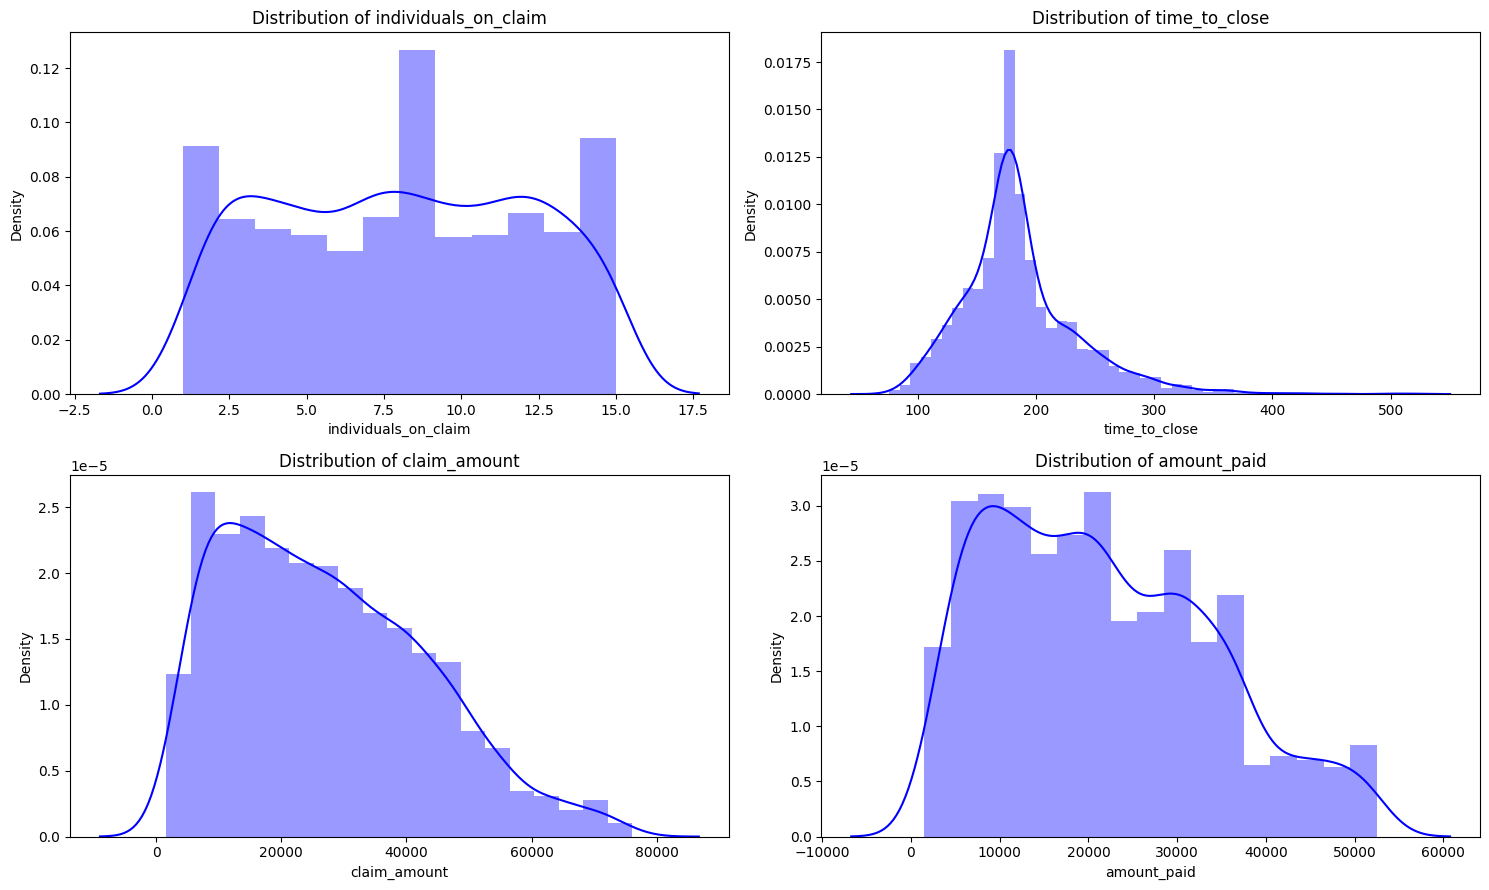

In [50]:
# Check distribution (num)
print(f'=== Distribution of Numerical features ')
plt.figure(figsize=(15, 9))
for i, col in enumerate(num):
    # Plot distribution 
    plt.subplot(2,2,i+1); sns.distplot(food_claims[col], color='blue')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

### 1.3 Fix columns and fill null values and 
- Amount Paid -> Replace with the overall median
- Linked Cases -> FALSE 
- Cause -> lower case,  trim spaces and replace 'vegetables' for 'vegetable'

In [51]:
# Replace null values in the "amount_paid" column with the overall median
overall_median = food_claims["amount_paid"].median()
food_claims["amount_paid"].fillna(overall_median, inplace=True)

# Replace null values in the "linked_cases" column with False
food_claims["linked_cases"].fillna(False, inplace=True)

# Replace all words for lower cases and trim spaces in "cause"
food_claims["cause"]= food_claims["cause"].str.lower().str.strip().str.replace('vegetables', 'vegetable')


### 1.4 Check Updates in dataset
- Linked Cases without Null 
- Amount Paid with 2k non null rowns and median value = 20105.7

In [52]:
# Check possible values in each column
for column in nom_num:
    possible_values = sorted(food_claims[column].unique())
    print(f"Possible values in column '{column}': {possible_values}")

Possible values in column 'location': ['FORTALEZA', 'NATAL', 'RECIFE', 'SAO LUIS']
Possible values in column 'linked_cases': [False, True]
Possible values in column 'cause': ['meat', 'unknown', 'vegetable']


In [53]:
food_claims[num].describe()

,individuals_on_claim,time_to_close,claim_amount,amount_paid
count,2000.000000,2000.00000,2000.000000,2000.000000
mean,8.049500,185.56800,27156.965235,21516.122230
std,4.087347,49.16339,16195.783099,12418.285043
min,1.000000,76.00000,1637.940000,1516.720000
25%,4.000000,158.00000,13758.952500,11106.652500
50%,8.000000,179.00000,24821.085000,20105.700000
75%,12.000000,204.00000,38581.350000,30472.895000
max,15.000000,518.00000,76106.800000,52498.750000


### 1.5 Summary Report

### Answer to the questions

The dataset contains 2000 rows and the following 8 columns:

**claim_id**: There are 2k unique identifiers as described. 0 missing values. No changes were made.

**time_to_close**:  Values between 76 and 518. 0 missing values. No changes were made.

**claim_amount**: Values between 1.6k and 76.1k, right skewed with a median value of 24.8k. 0 missing values. No changes were made.

**amount_paid**: Values between 1.5k and 52.5k, right skewed with a median value of 20.1k. **36 missing values that were replaced by the overall median value (20.1k), removed the Real sign ('R$'), and data type changed from object to float.**

**location**: There are 4 unique locations as described. 0 missing values. No changes were made.

**individuals_on_claim**: Values between 1 and 15. 0 missing values. No changes were made.

**linked_cases**: 2 options after treatment: TRUE or FALSE. **All the 26 missing values were replaced for FALSE**

**cause**: 3 options after treatment:  “vegetable”, “meat” or “unknown”. 0 missing values. **Changed all letters to lower case,  trim spaces and removed the plural from 'vegetables' to 'vegetable'** in order to match the column description.

## Task 2: 
Create a visualization that shows the number of claims in each location. Use the
visualization to:
- State which category of the variable location has the most observations
- Explain whether the observations are balanced across categories of the variable location

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64


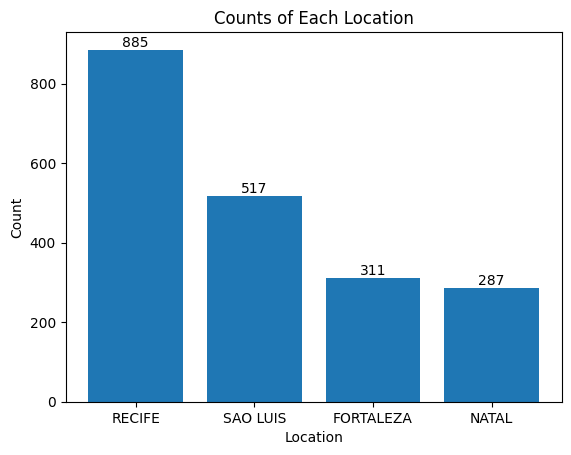

In [54]:
# Count the number of records for each coffee_type
location_counts = food_claims['location'].value_counts()
print(location_counts)

# Create a bar chart
plt.bar(location_counts.index, location_counts.values)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Counts of Each Location')

# Add count labels to each bar
for i, count in enumerate(location_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the chart
plt.show()

### Comment
- Recife is the location with the most observations (885 out of 2000, approximately 50%). As we can see on the chart above, the observations are unbalanced between the 4 categories, with Recife and Sao Luis with the most observations.

## Task 3: 
Describe the distribution of time to close for all claims. Your answer must include avisualization that shows the distribution

### Coment
We can see from the chart below that most cases (96%) takes between 100 to 300 days.Also, the distribution is right skewed. There is only 6 outlier who gets more than 400 days to close

In [55]:
food_claims.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


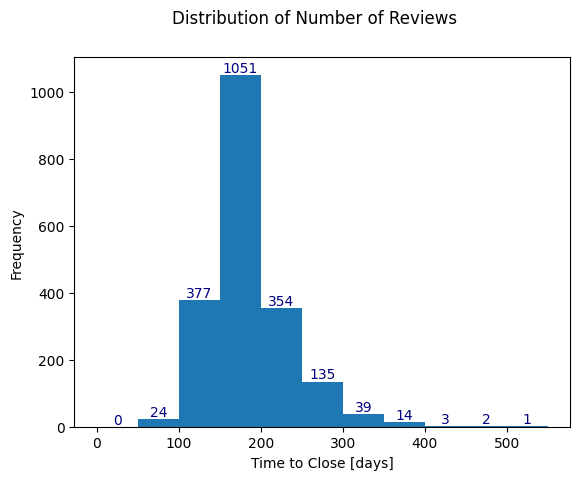

In [70]:
# Create a histogram of the number of reviews, capping the number of reviews at 3000
values, bins, bars = plt.hist(food_claims['time_to_close'], bins=11
                              , range=(0, 550)
                             )

# Add labels and title
plt.xlabel('Time to Close [days]')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Number of Reviews')
#plt.title('Places with less than 400 reviews, to remove outliers', fontsize = 10)
plt.bar_label(bars,  color='navy')

# Display the histogram
plt.show()

In [79]:
# Count the number of cases with less than 100 days
less_than_100_days = len(food_claims[food_claims['time_to_close'] < 100])

# Count the number of cases with more than 100 days
more_than_100_days = len(food_claims[food_claims['time_to_close'] > 100])

# Count the number of cases with more than 300 days
more_than_300_days = len(food_claims[food_claims['time_to_close'] > 300])

more_than_400_days = len(food_claims[food_claims['time_to_close'] > 400])

# Cases > 100 and < 300
between_100_and_300 = len(food_claims[(food_claims['time_to_close'] >= 100) & (food_claims['time_to_close'] <= 300)])

# Print the results
print(f"The number of cases that took less than 100 days: {less_than_100_days}.")
print(f"The number of cases that took more than 100 days: {more_than_100_days}.")
print(f"The number of cases that took more than 300 days: {more_than_300_days}.")
print(f"The number of cases that took more than 400 days: {more_than_400_days}.")
print(f"The number of cases that took between 100 and 300 days: {between_100_and_300}.")

The number of cases that took less than 100 days: 24.
The number of cases that took more than 100 days: 1970.
The number of cases that took more than 300 days: 53.
The number of cases that took more than 400 days: 6.
The number of cases that took between 100 and 300 days: 1923.


## Task 4: 
Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

### Coment: 
There is no clear differentiation between time to close across locations, even thought the claims are unequally distributed.
Based on the chart and summary statistics below, we can see that median, average and interquantile ranges are pretty similar across locations.

Further analyses should be done to understand the influence of number of counts per location in time to close, and to check if claims are randomly distributed between locations. With that we will be able to further understand why the time to close are similar even with unequally distributed number of claims.


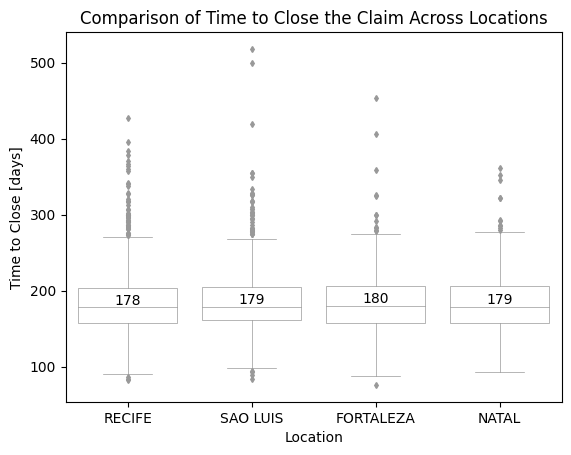

In [90]:
# Get the order to plot with the same logic than the first chart
previous_order = food_claims['location'].value_counts().index.tolist()

# Create a box plot without colors
sns.boxplot(data=food_claims, x='location', y='time_to_close', order=previous_order, color='white', linewidth=0.5, fliersize=3)

# Add a title
plt.title('Comparison of Time to Close the Claim Across Locations')

# Add a label with the median
medians = food_claims.groupby('location')['time_to_close'].median()

for i, median in enumerate(medians[previous_order]):
    plt.text(i, median, str(int(median)), horizontalalignment='center', verticalalignment='bottom')

# Add a label for the x and y axis
plt.xlabel('Location')
plt.ylabel('Time to Close [days]')

# Display the plot
plt.show()

In [88]:
# Calculate summary statistics of time_to_close column partitioned by location
summary_stats = food_claims.groupby('location')['time_to_close'].describe()

# Order the summary statistics by count in descending order
summary_stats = summary_stats.sort_values(by='count', ascending=False)

# Round the summary statistics to 2 decimal places
summary_stats = summary_stats.round(2)

# Display the summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
RECIFE,885.0,184.61,48.01,82.0,157.0,178.0,203.0,427.0
SAO LUIS,517.0,187.17,53.13,84.0,161.0,179.0,205.0,518.0
FORTALEZA,311.0,185.31,47.58,76.0,157.0,180.0,205.5,453.0
NATAL,287.0,185.93,47.06,93.0,157.0,179.0,205.5,361.0
